# Iris Dataset Analysis

## Prepare the dataset

Use `numpy` or to load `data/iris.data`. Remember to look at the file contents to understand the data format.

In [2]:
import numpy as np

# ppen the iris.data file, skipping empty lines
with open('../../data/iris.data') as f:
    lines = [line.strip() for line in f if line.strip()]

# split lines by commas to separate columns
data = [line.split(',') for line in lines]

# the first 4 columns as float attributes (X)
X = np.array([list(map(float, row[:4])) for row in data])
# the 5th column as class labels (y)
y = np.array([row[4] for row in data])

# check dataset structure
print("Attributes shape:", X.shape)
print("Example:", X[0], "Label:", y[0])

Attributes shape: (150, 4)
Example: [5.1 3.5 1.4 0.2] Label: Iris-setosa


Create a map that returns the attribute name given the attribute index.

- 0 -> sepal length
- 1 -> sepal width
- 2 -> petal length
- 3 -> petal width

In [3]:
# map each attribute index to its name
attribute_map = {
    0: "sepal length",
    1: "sepal width",
    2: "petal length",
    3: "petal width"}

## Data analysis

Write a function that prints the mean and another that prints the standard deviation of each attribute.

In [4]:
# print the mean of each attribute
def print_means(X):
    for i in range(X.shape[1]):
        mean = np.mean(X[:, i])
        print(f"{attribute_map[i]} mean: {mean:.2f}")

# print the standard deviation of each attribute
def print_stds(X):
    for i in range(X.shape[1]):
        std = np.std(X[:, i])
        print(f"{attribute_map[i]} std dev: {std:.2f}")

Use the functions you defined above to print the mean of the attributes for each class.

In [5]:
# get unique class labels
unique_classes = np.unique(y)

# print means for each class separately
for class_label in unique_classes:
    print(f"\nMeans for class: {class_label}")
    X_class = X[y == class_label]  # filter rows for this class
    print_means(X_class)


Means for class: Iris-setosa
sepal length mean: 5.01
sepal width mean: 3.42
petal length mean: 1.46
petal width mean: 0.24

Means for class: Iris-versicolor
sepal length mean: 5.94
sepal width mean: 2.77
petal length mean: 4.26
petal width mean: 1.33

Means for class: Iris-virginica
sepal length mean: 6.59
sepal width mean: 2.97
petal length mean: 5.55
petal width mean: 2.03


Now, let's plot this data. Use `matplotlib` to create scatter plots for petal and sepal. Use different colors for each class.

/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


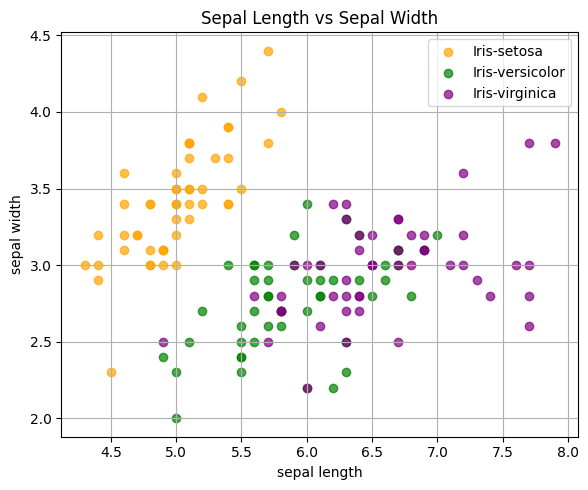

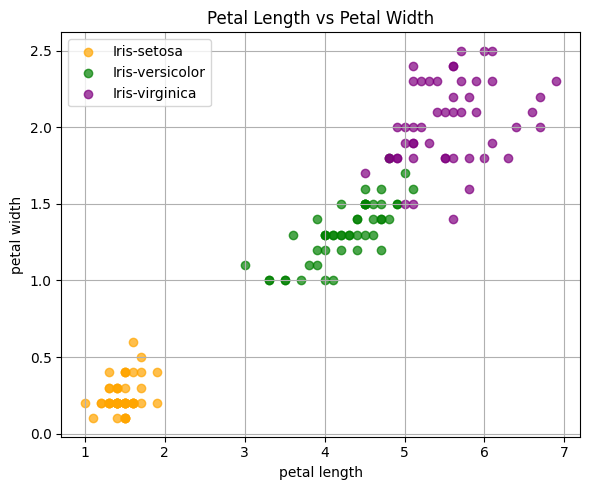

In [6]:
import matplotlib.pyplot as plt

# assigning color to each class
class_colors = {
    'Iris-setosa': 'orange',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'purple'
}

# plot Sepal Length vs Sepal Width
plt.figure(figsize=(6, 5))
for class_label in np.unique(y):
    X_class = X[y == class_label]
    plt.scatter(X_class[:, 0], X_class[:, 1], 
                label=class_label, color=class_colors[class_label], alpha=0.7)
plt.xlabel(attribute_map[0])
plt.ylabel(attribute_map[1])
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot Petal Length vs Petal Width
plt.figure(figsize=(6, 5))
for class_label in np.unique(y):
    X_class = X[y == class_label]
    plt.scatter(X_class[:, 2], X_class[:, 3], 
                label=class_label, color=class_colors[class_label], alpha=0.7)
plt.xlabel(attribute_map[2])
plt.ylabel(attribute_map[3])
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()